# Chapter 8 - [Tree-based](http://scikit-learn.org/0.17/modules/tree.html#classification) Methods
- Regression Tree
- Classification Tree
- Random Forest Classification & Regression
- Boosting - Gradient Boost

의 쓰임새, 그리고 Cross-Validation을 통한 튜닝을 익힌다. Tree, Random Forest, Gradient Boosting 들의 성능을 비교  
### Decision Tree는,
- 이해나 설명해주기가 무척 쉬워 (A+)
- 예측분석을 모르는 사람들에게 분석 결과를 얘기해 주기에 좋음
- 반면, 크기가 커지면서 overfit가 심하고
- 예측 성능이 떨어지나 (C+), Random Forest, Boosting과 같이 많은 수의 tree들로 이루어진 
- ensemble로 만들어 집단적 판단을 실행하면 좋은 성능을 보임    

### Random Forest와 Boosting 방법은,
- 다양하게 적용할 수 있고 
- 성능 잘 나오고
- 사용하기 쉬워 (overfitting 안하고, feature 그대로 사용해도 대충 괜찮고, 튜닝도 그리 복잡하지 않아) 
- 애를 써도 진짜 형편없는 모델 만들기도 어려워

요즈음 supervised learning/예측분석이 요구하는 **baseline**이라고 생각하기에 모든 분석가들이 잘 알아야 함. R과 Python이 훌륭한 implementation을 공짜로 제공하는데 ***이들을 안씀은 직무유기, 무능력, 무책임, 무개념, 그냥 죄***  

***Boosting***은 알고보면 직관적이며, 말이 되고, 설명하기 쉬운 알고리즘.  활용성과 성능도 좋음.  ***머신러닝/AI, data science를 하는 사람은 Boosting을 잘 사용하고, 설명할 수 있어야***

### [Leo Breiman](https://www.stat.berkeley.edu/~breiman/) 교수님에 부쳐,
Linear Regression을 처음 접했을 때 더 자세히 알고 싶어 내용을 따라가다 영 기분이 안좋아 이럴 리는 없다 생각되 다른 생각을 찾으니 오랜 동안 Bayesian, Frequentist들이 관련 주제로 다투었음을 뒤늦게 알았다. 또 Breiman 교수의 글도 읽게 되었다.    

#### Leo Breiman 교수님의 [Statistical Modeling: The Two Cultures](http://projecteuclid.org/download/pdf_1/euclid.ss/1009213726) ; 

물리학, 철학, 수학 강호의 3대 하드코어 문파를 소시적에 종횡무진 하시던 이 분이 산업계에선 통계/데이터마이닝 컨설팅 일을 하시며 computer science/공학하는 사람들과 함께 공력을 쌓으시더니, 다시 학계에 가 이번엔 U.C. Berkeley 통계학과 교수가 되시고, 그리고 어언 20년이 넘게 흘러 은퇴, 칠십하고도 서너살이 더 드신 연세에 Random Forest와 Boosting에 새로운 필이 생기시어 논문들을 내시더니, 이 글에선 21세기가 시작할 즈음 통계학의 전통적인 Data Modeling과 컴퓨터 사람들의 Algorithmic Modeling 문화 차이에 대한 생각을 적으셨다. 

내용은 통계학의 기존 Data Modeling을 비판하고, Algorithmic Modeling (Machine Learning) 쪽에서 배울 것이 많고, 맞는 생각이고, 앞으로 더욱 이 쪽이 발전할 것이니 통계학하는 사람들이 이 쪽에 신경쓰라는 내용. 자신의 Random Forest에 대한 소개와 우수성을 얘기.  

일본영화 Rashomon(나생문)에 비유해 Random Forest 같은 ensemble 모델의 개별 estimator들이 데이터를 각각 다른 측면에서 보았기에 그들의 생김이 다르지만 다 자신들의 관점에서 맞는 것이고, 또 성능도 그리 다르지 않기에 이들의 그룹 판단/예측을 이용하면 좋다는 얘기. 사람들 위원회가 항상 더 좋은 결과를 내는 것은 아니지만, 컴퓨터 모델로 된 위원회는 사람같이 숨겨진 의도나 정치적 흥정이 없기에 더 좋은 결과를 낸다.  

Occam's razor (오컴의 면도날) 지혜에 대해 의문함. 비슷한 성능이면 단순한 것이 좋지만 실제 세상/자연 많은 것은 어떤 stochastic식의 표현이 아니다. 그러기에, 어떤 데이터의 기저에 어떤 수학식이 있다 생각해 그 것을 찾아 거기에 데이터를 꿰어 보려는 것을 비판. 자연을 관통하는 질서/법칙을 발견해(이론/가설을 세워) 그 증거를 찾는 것이 과학인 것은 맞다. 하지만 어디에나 이런 접근이 맞는 것이라고 생각하진 않는다. 

우리 두뇌 작용으로 신을 믿고, 음악을 감상하고, 우주 원리를 이해하려 하고, 통계학을 하고, 우리 두뇌말고 또 다른 지능체를 만들려고 한다. 그런데 우린 아직 우리 두뇌 잘 모른다. 그렇지만 두뇌 작용의 결과물을 매일 매일 그리 의심없이 잘 쓰고 있다. 상황이 이럴 진대 모델의 해석성(interpretability)이 좋다는 것이 얼마나 의미있나? 우리가 interpretability를 좋아함은 ***사람이 원래 pattern 찾기 좋아하기 때문***이다. 구름에서 옛 애인 얼굴을 보고, 바위에서 용을 보고, 온 갖 것에서 익숙한 것을 찾아낸다. 그래야 불확실하고, 이해안되는 세상에서 마음이 안식을 갖고 또 직관적으로 대처하기 쉽도록 사람이 진화했기 때문인 것을.    

Curse of dimensionality, 저주인가, 축복인가?  중요한 변수를 선별하고, PCA 같은 것을 통해 변수들을 모아 어떻하든 변수/dimension 수를 줄이려고 했다. 이 것이 항상 맞나? Support Vector Machine은 Kernel 함수를 써 오히려 dimension을 증가해 좋은 결과를 보인다.

예전 나에게 iris classification을 해야 한다면 **꽃밭 사진**에서 iris versicolor와 iris virginica 식별/구별하는 것이라 생각했을 것이다. 음파 신호로 무엇을 구별해야 한다면, sonar 신호에서, 자신의 소리를 은폐, 왜곡하고 속여 **배경속에 묻히려는** 상대 잠수함 식별하는 것 따위를 생각했고. 이런 데이터는 협조적이지 않다. 데이터는 많지만 S/N비 개념없고, complexity가 워낙 높아 가령 pixel 레벨에서 보면 관점, 상황에 따라 variability가 워낙 크기에 사실은 연관성이 있어야 하는 pixel간의 연관성 이런 것 전혀 안보인다. Feature를 줄이기 이전에 뭐가 feature인지, 없으면 어떻게 feature를 만들어야 하는 지가 선행되어야 한다. 이런 때, 함부로 정보를 없에는 것은 위험하다. ***Feature reduction은 low-level 표현에서 high-level 추상적 feature를 만드는 과정 중에 자연스레 따라오는 결과이다. 사람 두뇌 처리도 비슷.***  

Deep Learning은 중간 단계에서 오히려 input represenation 보다 dimensionality를 증가하곤 한다. Breiman교수가 살아 계셔 Deep Learning을 본다면 어떨까? 분석 민주화를 위해 좋은 도구를 무료로 제공하는 것에 관심있었느니 요즘 R, Python 후배들이 사용하는 것을 보면, 

글 중에서,

- Data models in current use may have more damaging results than the publications in the social sciences based on a linear regression analysis. -> 그럼, 사회과학은 뭐가 되지? 쏜다!
- Breiman교수가 자금 포트폴리오 관리에 뉴럴네트를 사용하는 친구에게 '고객에게 뉴럴네트를 어찌 설명하나?' 물었더니 그 친구 왈; “We fit binary trees to the inputs and outputs of the neural nets and show the trees to the clients. Keeps them happy!” 나도 같은 생각. 

Breiman교수님 삶에 대해 간략히 [여기에](http://www.berkeley.edu/news/media/releases/2005/07/07_breiman.shtml)    

### Tree, Random Forest, Boosting 실습을,
1. 필요한 전처리를 하고
2. X, y (X_train, X_test, y_train, y_test)를 만들고
3. Cross-Validation (train/test split) 으로 test performance를 추정하고, 적절한 feature/hyperparameter를 찾아,
4. 적절한 hyperparameter를 적용한 모델을 만들어,
5. (가상으로 만든) test set에 적용해 예측을 하는 형태로 진행  

### Scikit-learn Tree 기반 모델에서 categorical predictor/변수 문제 
- Label Encoding이나 One Hot Encoding이나 만족스럽지 않다.
- 이유는 categorical 변수 이용해 split할 때, 가령 변수가 m개의 class/category를 갖으면  $2^{m-1} - 1$ 개의 2-sub_group 들에 대해 시험해 보아야 하는데 Label Encoding이나 One Hot Encoding는 이런 Split이 아니기 때문. 직접 split 조합을 만들어 적용할 수는 있지만 매끄럽지 않음.
- 실제로 Label Encoding이나 One Hot Encoding을 적용하면 보통은 괜찮은 결과를 보이지만, 이론의 이상적 구현이 아닌 것은 명백  
- scikit-learn에서 이 점을 보완한다고 하는데 아직 아님. ***R의 Tree가 이 점에선 깨끗한 구현***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn import metrics  

%matplotlib inline
plt.style.use('seaborn-white')

#### Decision tree 로 시작 - 다음 cell은 tree를 그리는 함수 ([참고](http://scikit-learn.org/stable/modules/tree.html)  )

In [2]:
from sklearn.externals.six import StringIO
import pydotplus
from IPython.display import Image

def show_tree(decision_tree, feature_names=None, class_names=None):   
    dot_data = StringIO()
    tree.export_graphviz(decision_tree, out_file=dot_data, feature_names=feature_names, 
                    class_names=class_names, filled=True, rounded=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return(graph)

### 8.1.1 Regression Trees
#### Data Load, Inspection & Munging - 사용할 데이터는 'Hitters' (야구선수 급여 예측)

In [3]:
# 'Hitters' data load & 점검 
Hitters = pd.read_csv('../Data/Hitters.csv')
Hitters.info()
Hitters.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 21 columns):
Unnamed: 0    322 non-null object
AtBat         322 non-null int64
Hits          322 non-null int64
HmRun         322 non-null int64
Runs          322 non-null int64
RBI           322 non-null int64
Walks         322 non-null int64
Years         322 non-null int64
CAtBat        322 non-null int64
CHits         322 non-null int64
CHmRun        322 non-null int64
CRuns         322 non-null int64
CRBI          322 non-null int64
CWalks        322 non-null int64
League        322 non-null object
Division      322 non-null object
PutOuts       322 non-null int64
Assists       322 non-null int64
Errors        322 non-null int64
Salary        263 non-null float64
NewLeague     322 non-null object
dtypes: float64(1), int64(16), object(4)
memory usage: 47.8+ KB


,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N


- 322개의 observation, 21개 column : 4개 column이 string, 나머지 column들은 숫자
- Response column인 'Salary'는 263개가 non-null. 나머지 값들은 null임. 문제 있음

### Data Munging : 
- 'Salary'에 null 값이 있는 row들 제거
- 첫번째 column 'Unnamed: 0' 을 이름바꾸고 이름 앞의 '-' 제거 
- 책에서 같이 Response 변수 'Salary' 를 log 변환 

In [4]:
Hitters.dropna(inplace=True)
Hitters.rename(columns = {'Unnamed: 0':'Name'}, inplace=True)
Hitters['Name'] = Hitters['Name'].map(lambda x: x.replace("-",""))
Hitters['Salary'] = np.log(Hitters.Salary)   # 책에서와 같이 'Salary'를 log 변환 
Hitters.index = range(1, 264)
Hitters.tail(3)

,Name,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
261,Wayne Tolleson,475,126,3,61,43,52,6,1700,433,...,217,93,146,A,W,37,113,7,5.953243,A
262,Willie Upshaw,573,144,9,85,60,78,8,3198,857,...,470,420,332,A,E,1314,131,12,6.866933,A
263,Willie Wilson,631,170,9,77,44,31,11,4908,1457,...,775,357,249,A,W,408,4,3,6.907755,A


### 작은 regression tree 만들기;
#### Predicting Baseball Players’ Salaries Using Regression Trees
1. Predictors:  'Years' & 'Hits' 으로 둘 다 numeric  
2. Response: 'Salary', numeric
3. Number of terminal nodes = 3

In [5]:
X = Hitters.loc[:,['Years', 'Hits']]     
y = Hitters.Salary                       

reg_tree = tree.DecisionTreeRegressor(max_leaf_nodes=3)  # Instantiate regression tree
reg_tree.fit(X, y)                      # train with all samples             

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=3, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

#### Fig. 8.1

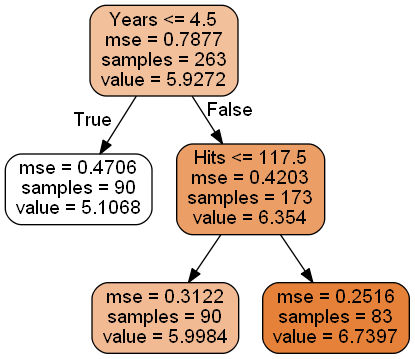

In [6]:
graph = show_tree(reg_tree, feature_names=list(X.columns))
Image(graph.create_png())

- samples : 해당 노드에 속한 sample들의 개수 
- value : 해당 노드에 속한 sample들의 mean response (reponse 평균)
- mse : sample들의 실제 response와 'value' 간의 Mean Squared Error

#### Fig. 8.2

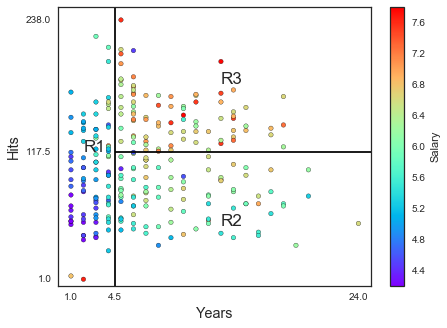

In [7]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(7, 5))          

Hitters.plot('Years','Hits', kind='scatter',c = 'Salary',ax=ax1, xticks=[1, 4.5, 24], yticks=[1, 117.5, 238],
              xlim=[0, 25], ylim=[-5, 250], cmap='rainbow')                     # Fig 8.2 

plt.xlabel('Years', fontsize='x-large')
plt.ylabel('Hits', fontsize='x-large')
plt.vlines(4.5,  ymin=-5, ymax=250)
plt.hlines(117.5, xmin=4.5, xmax=25)
plt.annotate('R1', xy=(2,117.5), fontsize=17)
plt.annotate('R2', xy=(13,50), fontsize=17)
plt.annotate('R3', xy=(13,180), fontsize=17)

In [8]:
Hitters.head(3)      # 확인 

,Name,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,6.163315,N
2,Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,6.173786,A
3,Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,6.214608,N


### scikit-learn decision tree에서 qualitative(categorical) 변수의 처리
- 가령 'color' feature가 5개의 값 ['red', 'orange', 'green', 'blue', 'violet']으로 되어 있을 때, R은 만약 ['red', 'blue']와 ['orange', 'green', 'violet']으로 나누는 것이 가장 MSE/ENTROPY를 낮추면 그렇게 split함. (tree, rpart, party). R의 decision tree들은 categorical 변수들을 이처럼 자연스레 지원.
- [R의 factor와 pandas의 categoric 변수](http://pandas.pydata.org/pandas-docs/stable/categorical.html) 지원에 관한 글 
- scikit-learn은 categoric 변수(변수 값이 string 같은 것)를 그대로 지원하지 않으므로 decision tree 에서도 이들을 적절히 숫자로 encoding 해 주어야 함
- 문제는, 어떤 형태로?   웹/stackoverflow에도 많은 혼란이 있음 
- [Label encoding](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html#sklearn.preprocessing.LabelEncoder)을 하면 숫자로 변화되며 lexical order에 따라 0,1,2,... 로 변환됨 (대문자 우선/구별). 이렇게 되어 scikit-learn이 변환된 변수를 받아드리긴 하지만 이는 사실 categoric 변수를 제대로 변환했다고 할 수 없음 (숫자니까 당연히 order/size 가 있음). 가령 위의 color feature에 적용하면;  

#### Label encoding 예

In [9]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
print(list(le.fit_transform(['blue', 'red', 'orange', 'green', 'violet', 'red', 'green', 'Blue'])))
print(le.inverse_transform([1, 4, 3, 2, 5, 4, 2, 0]))
list(enumerate(le.classes_))

[1, 4, 3, 2, 5, 4, 2, 0]
['blue' 'red' 'orange' 'green' 'violet' 'red' 'green' 'Blue']


[(0, 'Blue'),
 (1, 'blue'),
 (2, 'green'),
 (3, 'orange'),
 (4, 'red'),
 (5, 'violet')]

- 가령 ['red', 'blue']와 나머지 color 들로 split하려면 blue==1, red==4 이므로 이들을 같은 그룹으로 삼는 것이 불가능.  또한, "green'과 나머지 color들로 split도 불가능. 물론 ['red', 'violet']와 나머지 color같이 split은 가능 (split을 3.5에서) 
- [OneHotEncoding은](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder)? OneHotEncoder는 category 값이 숫자로 된 category 변수만 받아드리기에 category값이 string으로 된 (보통의) category 변수엔 그대로 적용 못함. 이 경우 먼저 labelencoding한 후에 적용해야 함  

#### pandas dummy encoding 활용
- OneHotEncoding과 같은 효과.  String 값을 갖는 categoric 변수에 적용 가능 
- 여전히 ['red', 'green']과 같이 두 개 이상의 값을 포함한 임의의 조합에 따라 split하는 것은 불가능. Linear Regression에서는 dummy encoding 활용이 전혀 문제 없음을 기억
- 그러나, tree나 random forest, boosting 에서 실제로 이를 적용했을 때는 성능상으로는 그리 문제 안됨. But, 많은 category class 값을 지닌 변수가 dimension size를 급격히 늘어나게 하는 것은 문제.  처리 시간과 메모리에 부담.  Depth가 더 깊어 짐. 

#### 모든 predictor들과 observation을 다 사용해 terminal node 개수를 12 까지 tree를 성장

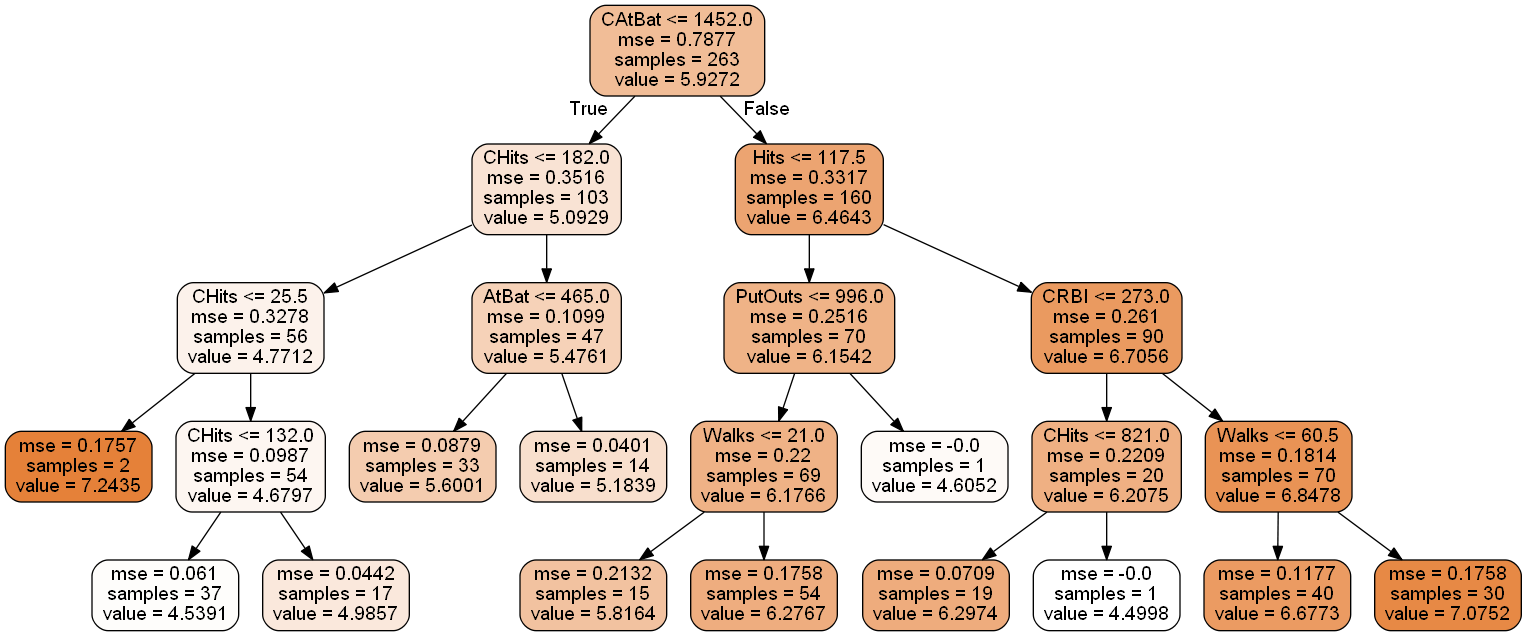

In [10]:
# Hitters 데이터 중에 qualitative 변수가 있으므로 이를 dummy encoding &'Name' column을 제거 
Hitters_enc = pd.get_dummies(Hitters.drop('Name', axis=1), drop_first=True)

# 모든 observation 활용 
X = Hitters_enc.drop('Salary', axis=1)
y = Hitters_enc.Salary

reg_tree = tree.DecisionTreeRegressor(max_leaf_nodes=12)
reg_tree.fit(X, y)
graph = show_tree(reg_tree, feature_names=list(X.columns))
Image(graph.create_png())

### Cross-Validation을 사용해 어떤 크기의 tree가 가장 좋은 test performance를 보일까 알아 봄 
### Estimating the best terminal nodes regression tree using Cross-Validation

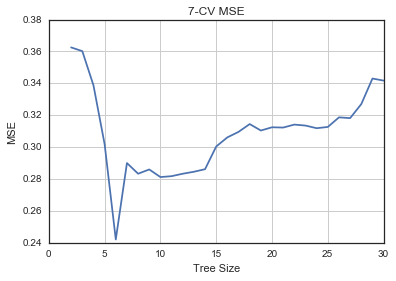

In [11]:
tree_sizes = range(2, 31)

MSE_scores = []

# 7-Fold CV for each tree size 
for size in tree_sizes:
    reg_tree = tree.DecisionTreeRegressor(max_leaf_nodes=size, random_state=123)
    MSE_s = -cross_val_score(reg_tree, X, y, cv=7, scoring='mean_squared_error')
    MSE_scores.append(np.mean(MSE_s))
    
# plot CV-MSE as tree size gets bigger 
plt.plot(tree_sizes, MSE_scores)
plt.title('7-CV MSE')
plt.xlabel('Tree Size')
plt.ylabel('MSE')
plt.grid(True)

***분석:*** Cross-Validation을 해 보니 leaf 개수가 6일 때 가장 나은 test performance를 보임.  따라서 terminal node가 6개가 되도록 모든 observation을 사용해 tree를 만듬 (Tree with 6 leaves seems to be the best)


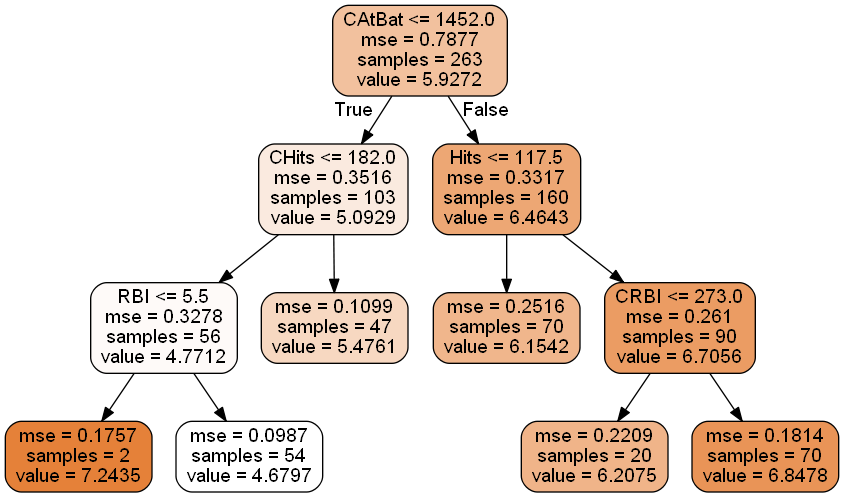

In [12]:
# display the 6 leaves tree 
reg_tree_best = tree.DecisionTreeRegressor(max_leaf_nodes=6, random_state=1)
reg_tree_best.fit(X, y)
graph = show_tree(reg_tree_best, feature_names=list(X.columns))
Image(graph.create_png())

- 만들어진 tree에 의하면 CAtBat, CHits, Hits ...  순으로 feature가 쓰였다. 즉, 이 순서로 greedy split를 하면 mse가 가장 낮아지므로 feature들의 중요도 순이라고 간주할 수 있다 

In [13]:
# Print the important features 
feature_importance=pd.DataFrame({'feature':X.columns, 'importance':reg_tree_best.feature_importances_})
feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
7,CAtBat,0.729415
8,CHits,0.078575
4,RBI,0.078456
1,Hits,0.074083
11,CRBI,0.039470
0,AtBat,0.000000
12,CWalks,0.000000
17,Division_W,0.000000
16,League_N,0.000000
15,Errors,0.000000


### 위에서 구한 (가장 좋을 것 같은) 6-leaves tree를 이용해 예측하기 (Making predictions with the best sized tree we estimated with CV)

In [14]:
# Let's generate a few test X 
features_used = list(X.columns[reg_tree_best.feature_importances_ > 0])

X_best = Hitters_enc.loc[:, features_used]
y = Hitters_enc.Salary

reg_tree_best = tree.DecisionTreeRegressor(max_leaf_nodes=6)
reg_tree_best.fit(X_best, y)

f_min = np.amin(X[features_used])
f_max = np.amax(X[features_used])
X_test = pd.concat([pd.Series(np.random.randint(f_min[0], f_max[0], size=10)),
                   pd.Series(np.random.randint(f_min[1], f_max[1], size=10)),
                   pd.Series(np.random.randint(f_min[2], f_max[2], size=10)),
                   pd.Series(np.random.randint(f_min[3], f_max[3], size=10)),
                   pd.Series(np.random.randint(f_min[4], f_max[4], size=10))], axis=1)
X_test.columns = features_used
print(X_test)

y_pred = reg_tree_best.predict(X_test)
y_pred

   Hits  RBI  CAtBat  CHits  CRBI
0    17   90    7546   3085  1407
1     3    1    8438   3887  1481
2   108  110   12446   4235   666
3   195   41   10380   3648  1580
4   167    5    5423   2420  1510
5   226   54    1595    127   765
6     8   54   10327   3289  1326
7    53   46   10470    502   333
8   180   96      97   3777  1205
9    71    1   11001   1141   407


array([ 6.15418249,  6.15418249,  6.15418249,  6.84783876,  6.84783876,
        6.84783876,  6.15418249,  6.15418249,  5.47611307,  6.15418249])

In [15]:
features_used

['Hits', 'RBI', 'CAtBat', 'CHits', 'CRBI']

#### Tree Pruning
scikit-learn은 현재 **Pruning**을 제공하지 않음. 그러나, 위에서 보았듯이 'terminal node의 수'에 따른 Cross-Validation과 같은 방법을 이용하여 Pruning과 비슷한 효과를 볼 수 있음.
- 뒤에 볼 Random Forest와 Boosting은 Pruning을 사용한 어떤 단일 tree보다 나음
    

### 8.1.2 Classification Trees

scikit-learn이 predictor로 qualitative 변수를 그대로 받아드리지 않기에 이들을 적절히 변환해야 함. 앞에서 보았듯이 여러 변환 방식이 있음.  R의 rpart/tree 를 적용할 때와 같은 결과 (같은 tree)를 낼 수도 아닐 수도 있음. 성능은 비슷함 

#### 예측분석 내용: Heart 데이터 사용 심장병 진단
- Qualitative variable **'AHD'** is the response 

In [16]:
Heart = pd.read_csv('../Data/Heart.csv', index_col=0).dropna()
# Heart.describe(include='all')
# Heart.info()

In [17]:
print(Heart.ChestPain.value_counts())
print()
print(Heart.Thal.value_counts())
Heart.AHD.value_counts()        # class imbalance 문제 없음 

asymptomatic    142
nonanginal       83
nontypical       49
typical          23
Name: ChestPain, dtype: int64

normal        164
reversable    115
fixed          18
Name: Thal, dtype: int64


No     160
Yes    137
Name: AHD, dtype: int64

#### Categorical 변수를 Label encoding 하여 decision tree에 적용하여도 경우에 따라 괜찮은 결과가 나올 수도 있다
- 카테고리 개수가 작으면 좋다
- pandas.factorize 함수를 사용할 수도 있다   

In [18]:
Heart.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [19]:
le = preprocessing.LabelEncoder()
Heart.ChestPain = le.fit_transform(Heart.ChestPain)
Heart.Thal = le.fit_transform(Heart.Thal)
Heart.AHD = le.fit_transform(Heart.AHD)
Heart.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,3,145,233,1,2,150,0,2.3,3,0.0,0,0
2,67,1,0,160,286,0,2,108,1,1.5,2,3.0,1,1
3,67,1,0,120,229,0,2,129,1,2.6,2,2.0,2,1
4,37,1,1,130,250,0,0,187,0,3.5,3,0.0,1,0
5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,1,0


In [20]:
X = Heart.drop('AHD', axis=1)
y = Heart.AHD    # No: 0,  Yes: 1

#### Leaf의 개수가 6개인 classification tree

In [21]:
clf_tree = tree.DecisionTreeClassifier(max_leaf_nodes=6, random_state=11)
clf_tree.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=6, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=11, splitter='best')

In [22]:
clf_tree.score(X,y)     # mean training accuracy 

0.82154882154882158

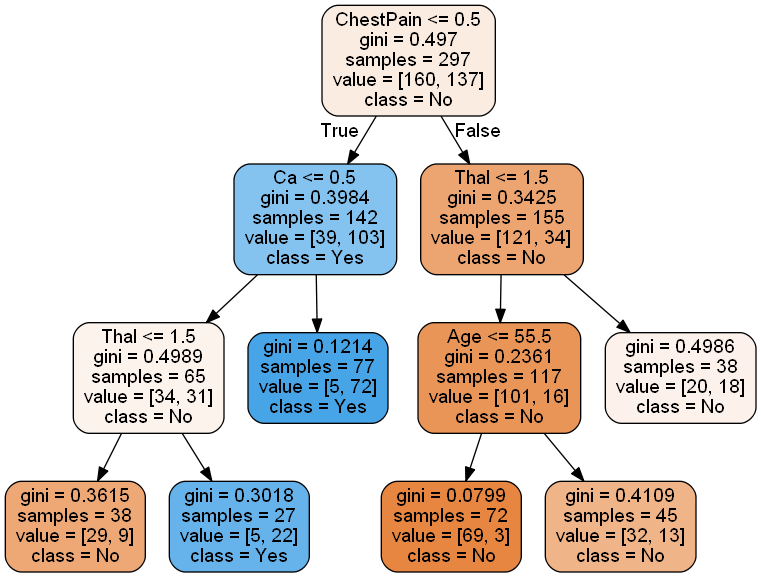

In [23]:
graph = show_tree(clf_tree, feature_names=list(X.columns), class_names=['No', 'Yes'])
Image(graph.create_png())

## 8.3 Lab: Decision Trees

### 8.3.1 Fitting Classification Trees
- Data : Carseats
- Response : Sales를 category 변수 'High'로 변환한 형태 (Yes(1) if Sales > 8 else No(0) ) 

In [24]:
Carseats = pd.read_csv('../Data/Carseats.csv', index_col=0)     # shape : (400, 11)
Carseats.head(3)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes


#### 1) 3개 이상의 Class를 갖는 category 변수(ShelveLoc)를 이번엔  'pd.factorize' 사용하여 label encoding 

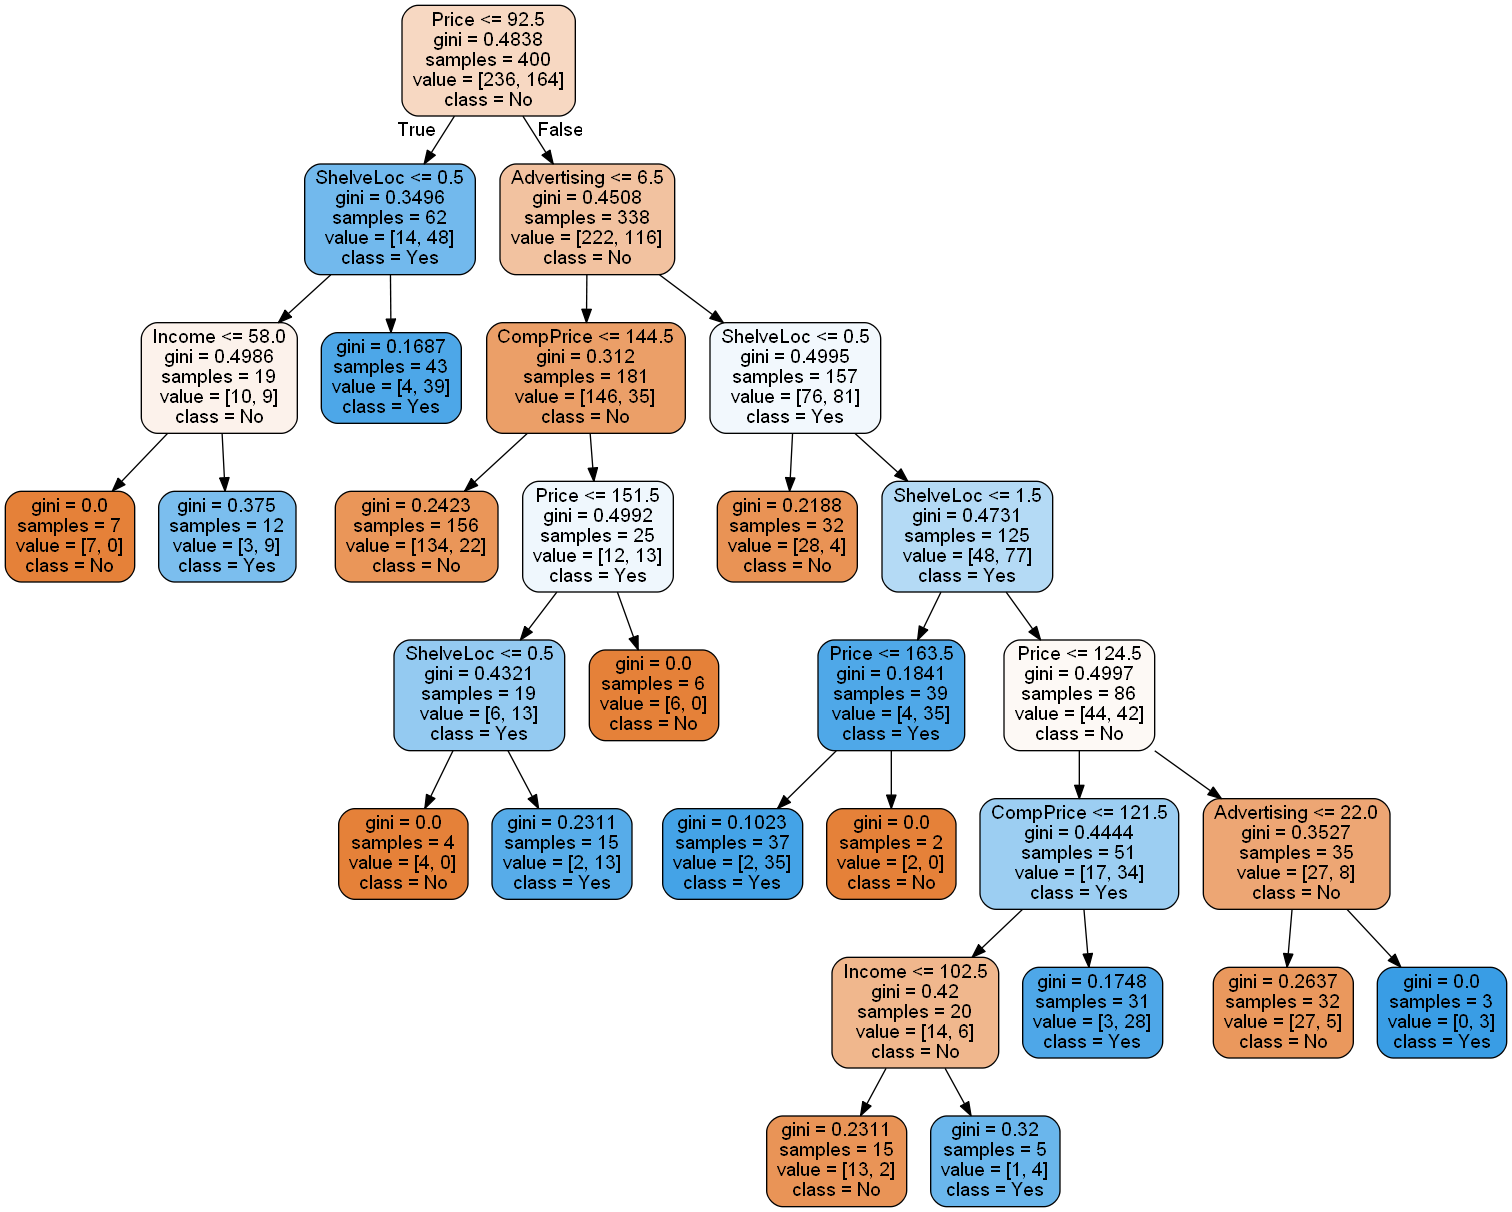

In [25]:
Carseats['High'] = Carseats.Sales.map(lambda x : 0 if x<=8 else 1)

# 3 개의 class를 갖는 'ShelveLoc' 을 간단히 'factorize' 함수로 변환 
Carseats.ShelveLoc = pd.factorize(Carseats.ShelveLoc)[0]

Carseats.Urban = Carseats.Urban.map({'No':0, 'Yes':1})   # map()을 사용 binarize 
Carseats.US = Carseats.US.map({'No':0, 'Yes':1})

X = Carseats.drop(['Sales', 'High'], axis=1)
y = Carseats.High

clf_tree = tree.DecisionTreeClassifier(max_leaf_nodes=15)  # 15 leaves tree  
clf_tree.fit(X,y)
graph = show_tree(clf_tree, feature_names=list(X.columns), class_names=['No', 'Yes'])
Image(graph.create_png())

#### Test performance estimation : 위의 15 leaves classification tree에 대해 5:5 train/test split 방법을 사용하여

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=1234)
clf_tree = tree.DecisionTreeClassifier(max_leaf_nodes=15)
clf_tree.fit(X_train, y_train)

y_pred = clf_tree.predict(X_test)
y_pred_prob = clf_tree.predict_proba(X_test)

conf_mat = metrics.confusion_matrix(y_test, y_pred)     
print(conf_mat)
TP = conf_mat[1,1]
TN = conf_mat[0,0]
FP = conf_mat[0,1]
FN = conf_mat[1,0]

print("Accuracy: ", (TP+TN) / (TP+TN+FP+FN) )
print("Sensitivity: ",  TP / (FN + TP) )
print("Precision: ",  TP / (FP + TP) )
print("False Positive Rate: ",  FP / (FP + TN) )
print("AUC Score: ", metrics.roc_auc_score(y_test, y_pred_prob[:,1]) )

[[84 41]
 [21 54]]
Accuracy:  0.69
Sensitivity:  0.72
Precision:  0.568421052632
False Positive Rate:  0.328
AUC Score:  0.691253333333


#### 최적의 classification tree size 추정  : 이번엔 Cross-Validation 사용하여 
- 앞에서 사용한 Carseats 데이터 
- Using both the Accuracy & AUC metrics for basic classifier testing. Your's could be different.
- [scoring parameters](http://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter)

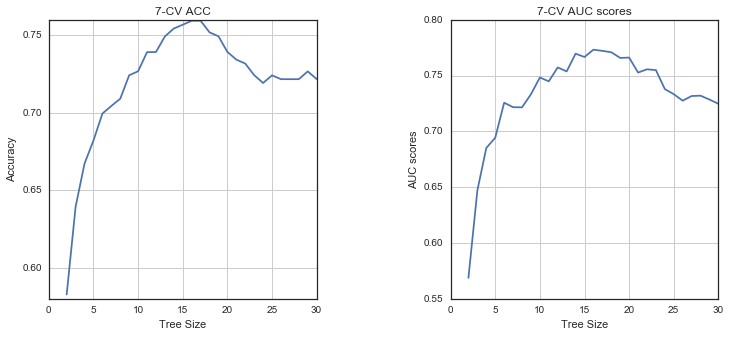

In [27]:
tree_sizes = range(2, 31)

ACC_scores = []
AUC_scores = []

# 7-Fold CV for each tree size 
for size in tree_sizes:
    clf_tree = tree.DecisionTreeClassifier(max_leaf_nodes=size, random_state=123)
    ACC_s = cross_val_score(clf_tree, X, y, cv=7, scoring='accuracy')
    AUC_s = cross_val_score(clf_tree, X, y, cv=7, scoring='roc_auc')
    ACC_scores.append(np.mean(ACC_s))
    AUC_scores.append(np.mean(AUC_s))
    
# plot CV-Accuracy and AUC socres w.r.t tree sizes 
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))          
fig.subplots_adjust(wspace=0.5)

ax1.plot(tree_sizes, ACC_scores)
ax1.set_title('7-CV ACC')
ax1.set_xlabel('Tree Size')
ax1.set_ylabel('Accuracy')
ax1.grid(True)

ax2.plot(tree_sizes, AUC_scores)
ax2.set_title('7-CV AUC scores')
ax2.set_xlabel('Tree Size')
ax2.set_ylabel('AUC scores')
ax2.grid(True)

Terminal node 개수가 약 15 정도가 Accuracy, AUC 측면을 모두 고려해 최적이라 판단

#### 2) 3개 이상의 Class를 갖는 qualitative predictor 들을 dummy encoding (one hot encoding) 하여

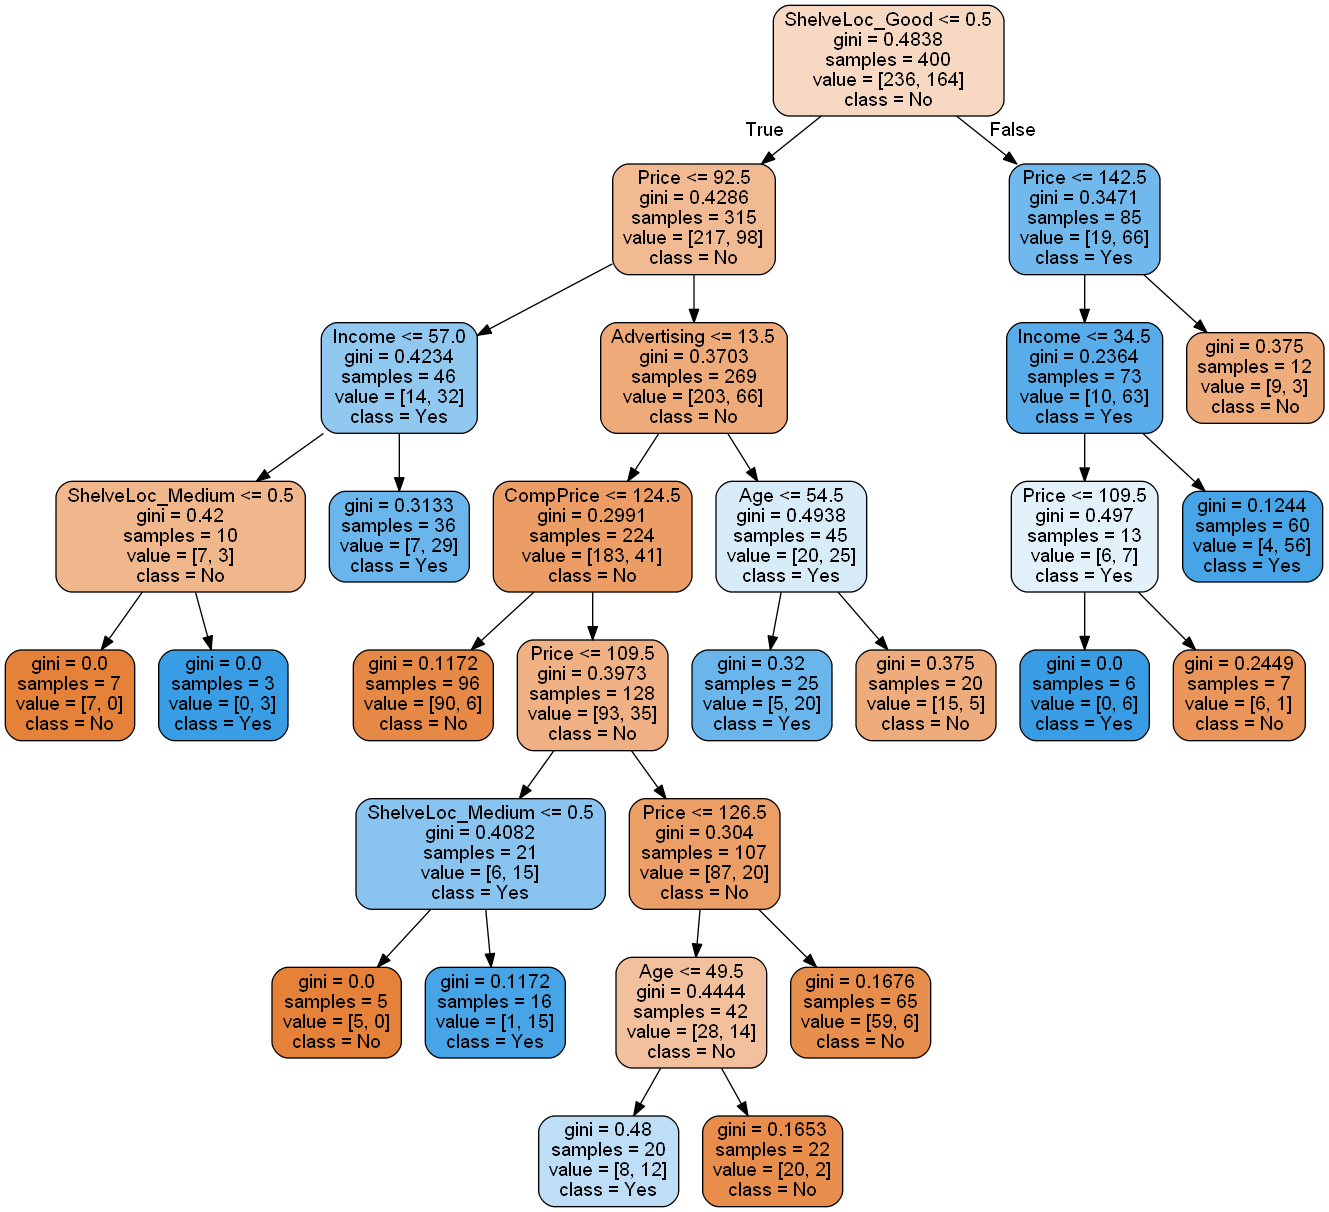

In [28]:
Carseats = pd.read_csv('../Data/Carseats.csv', index_col=0) 
Carseats['High'] = Carseats.Sales.map(lambda x : 0 if x<=8 else 1)

# category variable들을 dummy encoding 
Carseats_enc = pd.get_dummies(Carseats, drop_first=True)
#Carseats_enc = pd.get_dummies(Carseats)

X = Carseats_enc.drop(['Sales', 'High'], axis=1)
y = Carseats_enc.High

# one hot encoding을 쓴 모델에서는 가장 좋은 max_leaf_nodes가 달라질 수도 있지만 앞에서 얻은 결과 15 를 그냥 사용 
clf_tree = tree.DecisionTreeClassifier(max_leaf_nodes=15)   
clf_tree.fit(X,y)
graph = show_tree(clf_tree, feature_names=list(X.columns), class_names=['No', 'Yes'])
Image(graph.create_png())

- 앞의 1) 의 tree 모습과 다르다

#### one hot encoding 을 쓴 tree에 대해 Cross_validation을 사용해 최적의 tree size 추정 

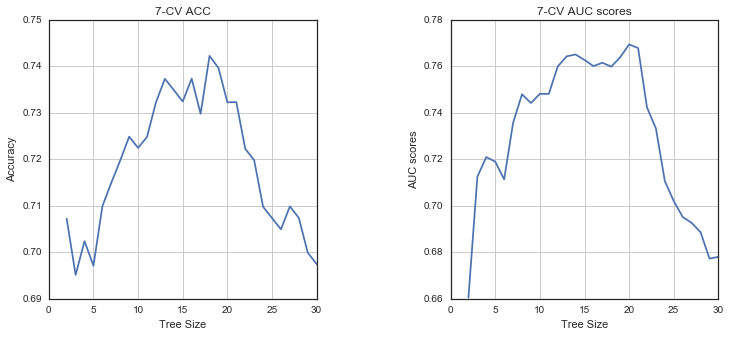

In [29]:
tree_sizes = range(2, 31)

ACC_scores = []
AUC_scores = []

# 7-Fold CV for each tree size 
for size in tree_sizes:
    clf_tree = tree.DecisionTreeClassifier(max_leaf_nodes=size, random_state=1)
    ACC_s = cross_val_score(clf_tree, X, y, cv=7, scoring='accuracy')
    AUC_s = cross_val_score(clf_tree, X, y, cv=7, scoring='roc_auc')
    ACC_scores.append(np.mean(ACC_s))
    AUC_scores.append(np.mean(AUC_s))
    
# plot CV-Accuracy and AUC socres w.r.t tree sizes 
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))          
fig.subplots_adjust(wspace=0.5)

ax1.plot(tree_sizes, ACC_scores)
ax1.set_title('7-CV ACC')
ax1.set_xlabel('Tree Size')
ax1.set_ylabel('Accuracy')
ax1.grid(True)

ax2.plot(tree_sizes, AUC_scores)
ax2.set_title('7-CV AUC scores')
ax2.set_xlabel('Tree Size')
ax2.set_ylabel('AUC scores')
ax2.grid(True)

- 여기서도 Terminal node의 개수가 13~18 사이가 적절하다고 알려 줌 

### Prediction 하기 예 (an example of making predicitions) 

In [30]:
#  Terminal node의 개수가 15개인 tree 만듬
clf_tree_best = tree.DecisionTreeClassifier(max_leaf_nodes=15, random_state=1)
clf_tree_best.fit(X, y)  # Use all the samples 

# Let's generate a little test set 
X_test = X.sample(5, random_state=123)
X_test.ShelveLoc_Good = [1, 0, 0, 1, 0]   # alter a little 
X_test.Price = [134, 777, 71, 182, 560]
X_test

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
235,115,62,11,289,134,56,16,1,0.0,0.0,1.0
43,77,69,0,25,777,50,18,0,1.0,1.0,0.0
304,133,52,16,290,71,43,11,0,1.0,1.0,1.0
156,98,72,0,59,182,65,16,1,1.0,1.0,0.0
343,137,102,13,422,560,71,10,0,1.0,0.0,1.0


In [31]:
# Predict on X_test (of course we don't know the true answer here. The test set is artificial) 
pd.Series(clf_tree_best.predict(X_test)).map({1:'Yes', 0:'No'})

0    Yes
1     No
2    Yes
3     No
4     No
dtype: object

### 8.3.2 Fitting Regression Trees
- Data: Boston
- target : medv 예측

In [32]:
# Load 'Boston' data
Boston = pd.read_csv('../Data/Boston.csv')
Boston.info()    # all numeric.  no Null,  Nice 
Boston.head()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
black      506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


#### Cross-Validation을 이용해 최적의 Regression Tree size 구함

best tree size =  8


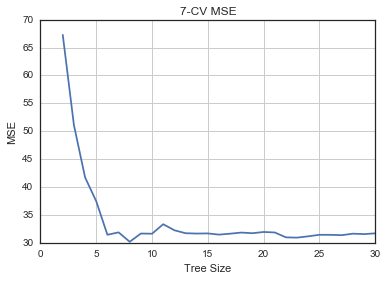

In [33]:
X = Boston.drop('medv', axis=1)
y = Boston.medv

tree_sizes = range(2, 31)

MSE_scores = []

# 7-Fold CV for each tree size 
for size in tree_sizes:
    reg_tree = tree.DecisionTreeRegressor(max_leaf_nodes=size, random_state=123)
    MSE_s = -cross_val_score(reg_tree, X, y, cv=7, scoring='mean_squared_error')
    MSE_scores.append(np.mean(MSE_s))
    
# plot CV-MSE as tree size gets bigger 
plt.plot(tree_sizes, MSE_scores)
plt.title('7-CV MSE')
plt.xlabel('Tree Size')
plt.ylabel('MSE')
plt.grid(True)

print("best tree size = ", tree_sizes[np.argmin(MSE_scores)])

- Terminal node의 개수가 8이 가장 좋으며, 이 때 test MSE가 30 정도  

#### Terminal node의 개수가 8일 때 decision tree 

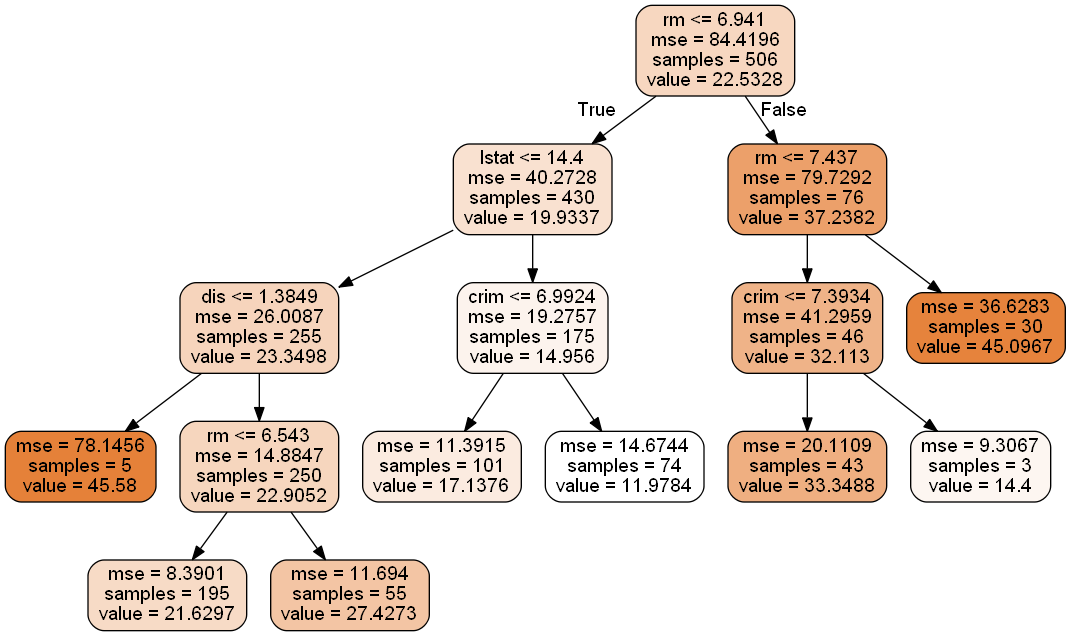

In [34]:
reg_tree_best = tree.DecisionTreeRegressor(max_leaf_nodes=8)
reg_tree_best.fit(X, y)
graph = show_tree(reg_tree_best, feature_names=X.columns)
Image(graph.create_png())

## 8.3.3 Random Forests ([참고](http://scikit-learn.org/0.17/modules/ensemble.html#))
- Ensemble Learning 방법 중 하나로 Tin Kam Ho가 1995, ***Random Decision Forest*** 발표 [(IEEE PAMI paper)](http://machine-learning.martinsewell.com/ensembles/rsm/Ho1998.pdf)
- Leo Breiman이 bagging 을 사용하여 [Random Forest](https://www.stat.berkeley.edu/~breiman/randomforest2001.pdf)
- Random Forest에서도 split할 때 feature 수(max_features), minimum sample 개수(min_samples_split), maximum depth(max_depth) 등을 cross-validation 통해 결정할 수 있다.  
- 중요한 parameter는 'n_estimators'와 'max_features'.  n_estimator는 클수록 좋지만 대개 300 에서 시작해 성능을 보아가며 조정하면 됨. max_features는 classification에서는 sqrt(feature 개수), regression에서는 log2(feature 개수) 주변에서 결정하면 좋은 경우가 많음.  하지만 이런 parameter에 그리 민감하지 않기에 사용하기 편한 알고리즘

### Random Forest Regression
- (또 다시) Boston 데이터에 [Random Forest](http://scikit-learn.org/0.17/modules/ensemble.html#forests-of-randomized-trees) Regressor 적용
- Boston 데이터를 책에서 같이 train/test 5:5로 나누어 training set로 Random Forest 만들고, Test set으로 평가 (물론, 시간이나 빠른 컴퓨터 있으면 Test Performance를 추정할 때 이렇게 하지 말고 그냥 Cross-Validation 하는 것이 나음) 

#### train/test split으로 test performance 추정:

In [35]:
# Import Random Forest estimator
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

# tree를 500개, split할 때 6개 feature 중에서 선택 
RF_regressor = RandomForestRegressor(n_estimators=500, max_features=6, random_state=123)  # 책에서 max_features를 6으로 했기에 

# Training set으로 RF regressor 학습 
RF_regressor.fit(X_train, y_train)

# Test with Test Set
y_pred = RF_regressor.predict(X_test)
print("MSE = ", metrics.mean_squared_error(y_test, y_pred) )

MSE =  11.5481897097


#### cross-validation으로 test performance 추정 & 최적의 'max_features' hyper_parameter 구하기 - 시간 걸림

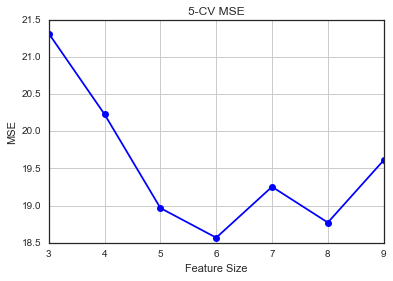

In [36]:
feature_sizes = range(3, 10)
MSE_scores = []

# 7-Fold CV for each tree  
for size in feature_sizes:
    RF_regressor1 = RandomForestRegressor(n_estimators=500, max_features=size, random_state=123, n_jobs=-1)
    MSE_s = -cross_val_score(RF_regressor1, X, y, cv=5, scoring='mean_squared_error', n_jobs=-1)
    MSE_scores.append(np.mean(MSE_s))
    
# plot CV-MSE as tree size gets bigger 
plt.plot(feature_sizes, MSE_scores, 'bo-')
plt.title('5-CV MSE')
plt.xlabel('Feature Size')
plt.ylabel('MSE')
plt.grid(True)

- split할 때 feature 개수를 역시 6개로 하는 것이 가장 좋고, 그 때 MSE가 18.5 정도라고

#### Variable Importance Plot : Random Forest 모델을 만들면 변수들의 중요성도 함께 알 수 있다  

In [37]:
Importance=pd.DataFrame({'feature':X.columns, 'importance':RF_regressor.feature_importances_}).sort_values(
    by='importance', ascending=True)
Importance

,feature,importance
3,chas,0.001359
1,zn,0.004646
8,rad,0.005574
11,black,0.018960
9,tax,0.020318
6,age,0.024482
10,ptratio,0.034642
4,nox,0.056986
0,crim,0.062389
7,dis,0.064484


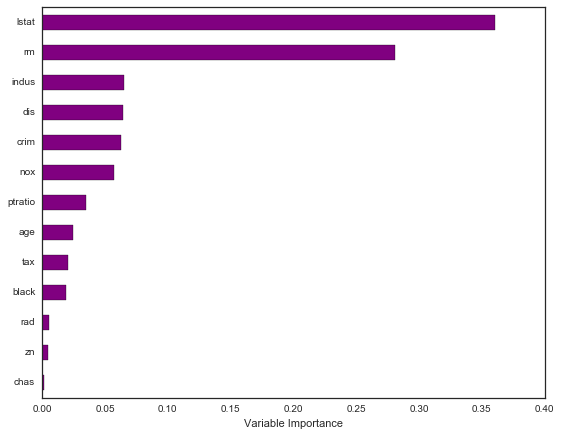

In [38]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(9,7)) 

Importance.plot(kind='barh', color='purple', ax=ax1)
y_pos = np.arange(len(Importance))
plt.xlabel('Variable Importance')
plt.gca().legend_ = None
plt.yticks(y_pos, Importance.feature)
plt.show()

### Random Forest Classification
- Heart 데이터를 이용하여
- Random Forest와 Tree를 비교해 본다 

In [39]:
Heart.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,3,145,233,1,2,150,0,2.3,3,0.0,0,0
2,67,1,0,160,286,0,2,108,1,1.5,2,3.0,1,1
3,67,1,0,120,229,0,2,129,1,2.6,2,2.0,2,1
4,37,1,1,130,250,0,0,187,0,3.5,3,0.0,1,0
5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,1,0



우선 하나의 Classification Tree를 만들어본다
#### 1. Let's build a Classification Tree for a baseline: Cross-Validation을 사용해 가장 적당한 크기의 tree의 test 성능 추정치를 봄 

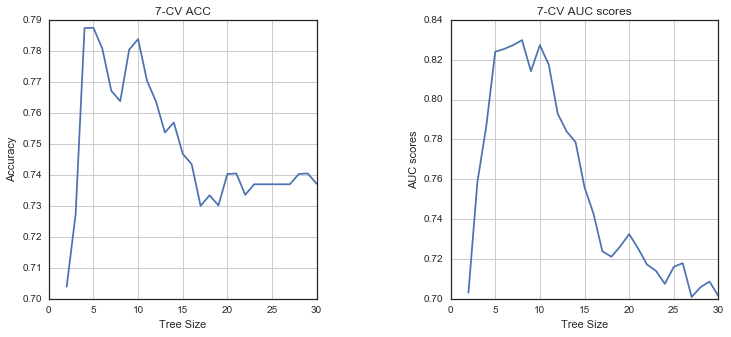

In [40]:
X = Heart.drop('AHD', axis=1)
y = Heart.AHD

tree_sizes = range(2, 31)

ACC_scores = []
AUC_scores = []

# 7-Fold CV for each tree size 
for size in tree_sizes:
    clf_tree = tree.DecisionTreeClassifier(max_leaf_nodes=size, random_state=123)
    ACC_s = cross_val_score(clf_tree, X, y, cv=7, scoring='accuracy')
    AUC_s = cross_val_score(clf_tree, X, y, cv=7, scoring='roc_auc')
    ACC_scores.append(np.mean(ACC_s))
    AUC_scores.append(np.mean(AUC_s))
    
# plot CV-Accuracy and AUC socres w.r.t tree sizes 
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))          
fig.subplots_adjust(wspace=0.5)

ax1.plot(tree_sizes, ACC_scores)
ax1.set_title('7-CV ACC')
ax1.set_xlabel('Tree Size')
ax1.set_ylabel('Accuracy')
ax1.grid(True)

ax2.plot(tree_sizes, AUC_scores)
ax2.set_title('7-CV AUC scores')
ax2.set_xlabel('Tree Size')
ax2.set_ylabel('AUC scores')
ax2.grid(True)

Terminal node가 5개인 Tree가 가장 나은 것 같음.  그 때의 Accuracy와 AUC는 위의 그림과 같이 (0.785, 0.83) 정도 

#### 2. Random Forest Classifier 를 만들어 위의 Classification Tree와 비교 (See if Random Forest can improve on the tree)
- tree 개수 : 300

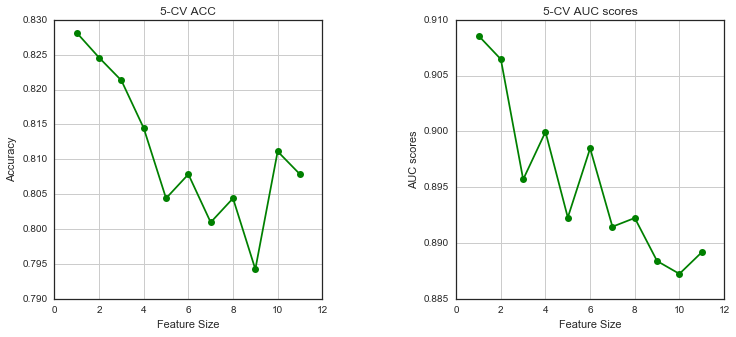

In [41]:
feature_sizes = range(1, X.shape[1] - 1)

ACC_scores = []
AUC_scores = []

# 시간 걸림 (takes time)
for size in feature_sizes:
    clf_RF = RandomForestClassifier(n_estimators=300, max_features=size, criterion='entropy', random_state=123, n_jobs=-1)
    ACC_s = cross_val_score(clf_RF, X, y, cv=5, scoring='accuracy')
    AUC_s = cross_val_score(clf_RF, X, y, cv=5, scoring='roc_auc')
    ACC_scores.append(np.mean(ACC_s))
    AUC_scores.append(np.mean(AUC_s))
    
# plot CV-Accuracy and AUC socres w.r.t tree sizes 
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))          
fig.subplots_adjust(wspace=0.5)

ax1.plot(feature_sizes, ACC_scores, 'go-')
ax1.set_title('5-CV ACC')
ax1.set_xlabel('Feature Size')
ax1.set_ylabel('Accuracy')
ax1.grid(True)

ax2.plot(feature_sizes, AUC_scores, 'go-')
ax2.set_title('5-CV AUC scores')
ax2.set_xlabel('Feature Size')
ax2.set_ylabel('AUC scores')
ax2.grid(True)

Split할 때 고려하는 feature 들의 개수가 작을 수록 Accuracy와 AUC 가 좋다.  Feature size=2로 하면 (0.82, 0.9) 정도가 되어 Tree일 때의 (0.78, 0.83) 보다 향상됨 (This data really favors small 'max_features' size. Theres a little improvements both on accuracy and AUC over the tree) 

#### Random Forest로 Heart 데이터 예측 해 보기
- 'max_features'가 2로 500개 tree로 된 random forest를 만들어,
- 임의로 만든 test sample을 주어본다 

In [42]:
clf_RF_best = RandomForestClassifier(n_estimators=500, max_features=2, criterion='entropy', random_state=123, n_jobs=-1)
clf_RF_best.fit(X, y)

# Training set으로 예측해 보기  : 샘플들을 다 맞춤 
X_train = X.sample(10, random_state=12)
y_train = y.sample(10, random_state=12)
y_train_pred = clf_RF_best.predict(X_train)
print("Training Set 예측 예 : ")
print( pd.DataFrame(list(zip(y_train, y_train_pred)), columns=['actual', 'prediction']) )

# Test set을 만들자 
X_test = X.sample(10, random_state=123)

# The following is not the same as 'sklearn.utils.shuffle'. 
# while 'sklearn.utils.shuffle' shuffles the rows, 'shuffle_DF' shuffles the values and leaves
# the row index (order) intact
def shuffle_DF(DF, n=1, axis=0):  # axis=0 : column별로 column value 들을 shuffle   
    df_val = DF.values
    for _ in range(n):
        df_val = np.apply_along_axis(np.random.permutation, axis=axis, arr=df_val)
    
    shuffled_DF = pd.DataFrame(df_val, index=DF.index, columns=DF.columns)
    return( shuffled_DF )

X_test = shuffle_DF(X_test)

print("\nTest Set:\n", X_test)
print("\nTest Response 예측:\n", list(zip(X_test.index, clf_RF_best.predict(X_test) ) ) )

Training Set 예측 예 : 
   actual  prediction
0       1           1
1       1           1
2       0           0
3       0           0
4       1           1
5       0           0
6       1           1
7       1           1
8       1           1
9       0           0

Test Set:
       Age  Sex  ChestPain  RestBP   Chol  Fbs  RestECG  MaxHR  ExAng  Oldpeak  \
82   41.0  0.0        2.0   110.0  197.0  0.0      0.0  144.0    0.0      1.3   
127  56.0  0.0        2.0   140.0  235.0  0.0      2.0  151.0    0.0      1.8   
107  58.0  0.0        0.0   120.0  249.0  1.0      0.0  153.0    0.0      0.0   
280  40.0  1.0        0.0   152.0  294.0  0.0      2.0  158.0    0.0      0.6   
269  69.0  0.0        0.0   140.0  214.0  0.0      2.0  143.0    0.0      1.6   
238  59.0  1.0        0.0   110.0  177.0  0.0      0.0  181.0    0.0      4.0   
31   53.0  1.0        0.0   130.0  239.0  0.0      0.0  131.0    0.0      0.0   
163  54.0  0.0        3.0   140.0  288.0  0.0      0.0  133.0    0.0      0.8

- test data를 인위적으로 만들었기에 실제 true response는 없음 

#### Random Forest Classifier로 얻은 변수 중요도

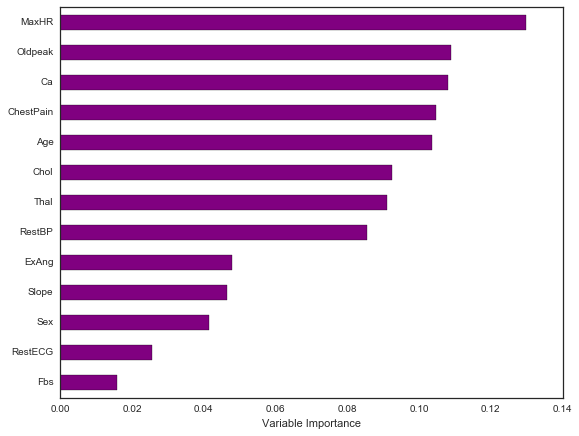

In [43]:
# clf_RF_best = RandomForestClassifier(n_estimators=500, max_features=2, criterion='entropy', random_state=123, n_jobs=-1)
# clf_RF_best.fit(X, y)

Importance=pd.DataFrame({'feature':X.columns, 'importance':clf_RF_best.feature_importances_}).sort_values(
    by='importance', ascending=True)

fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(9,7)) 

Importance.plot(kind='barh', color='purple', ax=ax1)
y_pos = np.arange(len(Importance))
plt.xlabel('Variable Importance')
plt.gca().legend_ = None
plt.yticks(y_pos, Importance.feature)
plt.show()

## [8.3.4 Boosting](http://scikit-learn.org/0.17/modules/ensemble.html#gradient-tree-boosting)
- Random Forest 같이 Regression, Classification에 두루 사용되는 모델
- 성능 좋고, overfitting이 심하지 않고, Python에서 쓰기 그리 어렵지 않음
- 이 전 tree들이 맞추지 못한 오류에 대해 뒤에 오는 tree가 이 전 보다 조금 더 신경을 써 맞추려는 (오류를 보정하는) 형태로 진행되는 ***sequential process*** 
- ***학습능력이 작은*** 조그만한 tree (shallow tree)들이 조금씩 이전 tree들의 부족한 점을 메꾸어 가기에  overfitting을 잘 하지 않고 결국은 정말 잘 하게 된다는 메커니즘 (Simulated Anealing 비슷하게 global 최적으로 향하는...)   
- 1995년 Yoav Freund와 Robert Schapire가 [adaboost](http://cseweb.ucsd.edu/~yfreund/papers/boostingexperiments.pdf) 발표해 사람들이 boosting 방법에 대해 널리 알게 됨  
- Boosting은 메타 머신 러닝 모델로 꼭 tree들로 만들어야 하는 것은 아님
- Random Forest에 비해 패러미터 세팅에 신경써야 하고, training 시간이 더 걸리지만 잘 되었을 때 더 나은 성능이 나오곤 함
- Random Forest와 같이 Boosting도 high-dimensional sparse 데이터에는 만족스런 성능이 잘 안나옴. 역시 categorical 변수의 category가 많으면 (high cardinality)이면  
- 책의 Gradient Boosting도 Boosting 알고리즘 중 하나
- 다른 tree-based Boosting 모델과 같이 gradient boosting도 작은 tree (max_depth가 1,2,3 정도)들을 많이 이용해 (n_estimators) 조금씩 오류를 수정하도록 (learning_rate)하면서 학습/훈련이 진행.     
- 중요한 hyper-parameter: 'max-depth' 또는 'max_leaf_nodes'로 얼마나 강한/큰 tree estimator를 사용할 것인가를 결정. Boosting은 약한 estimator로 천천히 학습을 함이 좋으므로 depth가 4이하, leaf-node 수가 15가 넘는 경우는 드뭄. (하지만 큰 tree를 그냥 제외시키지 말고 5 level 이상 깊이의 tree도 데이터 복잡도에 따라 시험해 보도록) learning_rate가 크면 빨리 오류를 보정하지만 overfitting 가능성도 커짐. learning_rate를 작게 하고 n_estimators를 크게 하면 overfitting 않고 차분히 학습하여 좋지만 training 시간이 많이 걸리는 것이 단점.  
- 보통 learning_rate는 0.05이하, n_estimators는 100 이상에서 시작해 자신에게 주어진 시간, 컴퓨터 성능, 보상에 따라 이들과 이외 다른 hyperparameter 들을 튜닝 
- [여기](https://www.youtube.com/watch?v=LgLcfZjNF44)에 Kaggle에서 이름 날리는 사람 중 하나인 Owen Zhang이 Gradient Boosting에 대한 생각, stacking/blending에 관한 간단한 언급, Kaggle 시합에서 자기 경험 그 외 얘기들
- [여기](https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/)에 Python Gradient Boosting Machine에 대한 친절한 설명과 자세한 parameter 설명 & 사용 예. Parameter 세팅을 체계적으로 탐색하는 기법 등.  

### Linear regression 못지 않게 직관적이며, 말이 되고, 설명하기 쉬운 알고리즘이라 생각함.  활용성과 성능은 비교 안되고.  머신러닝, AI, data science를 하는 사람은 Boosting을 잘 사용하고, 설명할 수 있어야  

### [Gradient Boosting Regression](http://scikit-learn.org/0.17/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn.ensemble.GradientBoostingRegressor) 
- Boston 데이터 이용
- Adapted from [this](http://scikit-learn.org/0.17/auto_examples/ensemble/plot_gradient_boosting_regression.html)

In [44]:
Boston.tail()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


#### train/test split 방법으로 test error 추정

In [45]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.utils import shuffle

X = Boston.drop('medv', axis=1)
y = Boston.medv
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, random_state=1234)  #train:test = 9:1 

params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 1, 'max_features': 'sqrt', 'subsample' : 0.9,
          'learning_rate': 0.01, 'loss': 'ls', 'random_state': 1}

# Grandient Boosting regressor를 만들고 학습 
GRB_reg = GradientBoostingRegressor(**params)
GRB_reg.fit(X_train, y_train)

mse = metrics.mean_squared_error(y_test, GRB_reg.predict(X_test))
print("Train/Test Split MSE: %.4f" % mse)

Train/Test Split MSE: 9.2198


#### 차례로 tree들을 만들어 갈 때 GB Regression Tree의 성능 (least squares error/MSE)이 어떻게 변화하는 지 모니터 
- 계속 train/test 사용

Train/Test Split GBR with 500 estimators: 9.2198


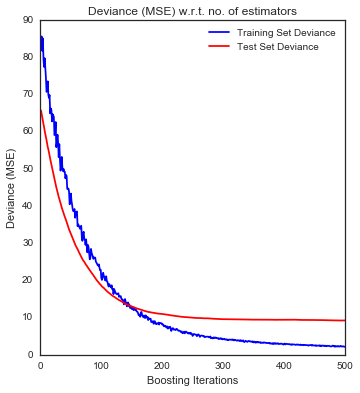

In [46]:
# test score를 담을 크기의 그릇을 미리 만듬면 append() 같이 느릔 operation 안써도 됨 
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

# compute test set deviance
for i, y_pred in enumerate(GRB_reg.staged_predict(X_test)):   # 'staged_predict' 참고 
    test_score[i] = GRB_reg.loss_(y_test, y_pred)              # 'loss_' 참고 

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance (MSE) w.r.t. no. of estimators')
plt.plot(np.arange(params['n_estimators']) + 1, GRB_reg.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance (MSE)')
print("Train/Test Split GBR with 500 estimators: %.4f" % test_score[-1])

Training set 에러는 예상대로 tree가 증가할 수록 작아짐. Test error 추정도 500 정도까지도 조금씩 작아짐 

#### GBR의 parameter를 앞의 것과 그대로 하고  tree 개수(즉, iteration 수)를 1000으로 하여 cross-validation을 통해 보다 믿음직한 MSE를 추정해 보면,

In [47]:
params = {'n_estimators': 1000, 'max_depth': 4, 'min_samples_split': 1, 'max_features': 'sqrt', 'subsample' : 0.9,
          'learning_rate': 0.01, 'loss': 'ls',  'random_state': 1}

GRB_reg = GradientBoostingRegressor(**params)

X, y = shuffle(X, y, random_state=123)   # Let's shuffle before going into CV
MSE_s = -cross_val_score(GRB_reg, X, y, cv=10, scoring='mean_squared_error')

print("1000 iterations 10-CV MSE: %.4f" % np.mean(MSE_s) )


1000 iterations 10-CV MSE: 8.8577


- CV-MSE가 8.85가 나와 앞서 같은 데이터에 최적의 tree (terminal node 수 = 8) 일 때의 CV-MSE = 30 이나 
- Random Forest가 보여준 CV-MSE = 18.5 에 비해

Boosting Regressor의 성능 CV-MSE = 8,857 이 나음을 알 수 있다.

#### Boosting 방법이 iteration이 지나치면 overfit도 하기에 n_estimator 패러미터를 변경하며 cross-validation 하면,

Minimun MSE:9.9872 when n_estimators=1700


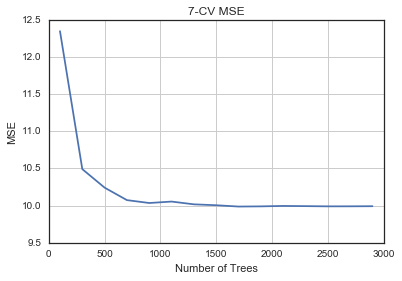

In [48]:
tree_sizes = list(range(100, 3001, 200))
X, y = shuffle(X, y, random_state=123)   # Let's shuffle before going into CV
MSE_scores = []

for size in tree_sizes:
    GRB_reg1 = GradientBoostingRegressor(n_estimators=size, max_depth=3, min_samples_split=1, max_features='sqrt', subsample=0.9,
                                         learning_rate=0.05, loss='ls', random_state=1)
    MSE_s = -cross_val_score(GRB_reg1, X, y, cv=7, scoring='mean_squared_error', n_jobs=-1)
    MSE_scores.append(np.mean(MSE_s))
    
plt.plot(tree_sizes, MSE_scores)
plt.title('7-CV MSE')
plt.xlabel('Number of Trees')
plt.ylabel('MSE') 
plt.grid(True)

print("Minimun MSE:%.4f when n_estimators=%d" % (np.min(MSE_scores), tree_sizes[np.argmin(MSE_scores)] ))  

Overfit을 하지만 그 정도가 매우 미미함 

#### Making Predictions with Gradient Boosting Regressor
- 다른 estimator들의 사용법과 다르지 않음

In [49]:
X_test = shuffle_DF(X.sample(10, random_state=1))  # generate arbitrary test set 

params = {'n_estimators': 1700, 'max_depth': 3, 'min_samples_split': 1, 'max_features': 'sqrt', 'subsample' : 0.9,
          'learning_rate': 0.05, 'loss': 'ls',  'random_state': 1}

GRB_reg_x = GradientBoostingRegressor(**params)
GRB_reg_x.fit(X,y)

# prediction 결과 출력 
pd.DataFrame(GRB_reg_x.predict(X_test), index=X_test.index, columns=['prediction'])

,prediction
454,19.173348
123,19.502174
187,19.179613
505,19.705905
69,20.335089
349,24.923307
309,16.986751
461,22.629180
272,23.579309
480,29.002399


### [Gradient Boosting Classification](http://scikit-learn.org/0.17/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier) 
- classification tree와 random forest classifier에서도 사용했던 Heart 데이터 이용해 예측분석하고 비교 
 * Heart 데이터는 앞서 이미 label encoding으로 변환되었음. One hot encoding 같은 다른 encoding으로 category 변수를 바꿔 모델을 만들 수도 ..
- 상식적인 hyperparameter 값들 사용하고, 'n_estimators' 수는 cross-validation으로 결정하는 방식으로 진행 

*** @수 분 이상 시간 걸림 ***

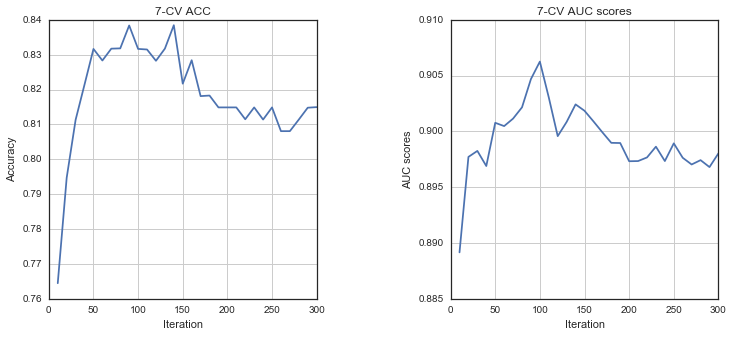

In [50]:
X = Heart.drop('AHD', axis=1)
y = Heart.AHD

tree_number = range(10, 301, 10)

ACC_scores = []
AUC_scores = []

X, y = shuffle(X, y, random_state=123)   # Let's shuffle before going into CV

for number in tree_number:
    GB_clf = GradientBoostingClassifier(n_estimators=number, max_depth=4, min_samples_split=1, max_features = 'sqrt', subsample = 0.9,
                                         learning_rate=0.02, loss='exponential', random_state=123)
    ACC_s = cross_val_score(GB_clf, X, y, cv=7, scoring='accuracy', n_jobs=-1)
    AUC_s = cross_val_score(GB_clf, X, y, cv=7, scoring='roc_auc', n_jobs=-1)
    ACC_scores.append(np.mean(ACC_s))
    AUC_scores.append(np.mean(AUC_s))
    
# plot CV-Accuracy and AUC socres w.r.t number of iterations (number of trees added) 
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))          
fig.subplots_adjust(wspace=0.5)

ax1.plot(tree_number, ACC_scores)
ax1.set_title('7-CV ACC')
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Accuracy')
ax1.grid(True)

ax2.plot(tree_number, AUC_scores)
ax2.set_title('7-CV AUC scores')
ax2.set_xlabel('Iteration')
ax2.set_ylabel('AUC scores')
ax2.grid(True)


cross-validation 결과를 보니 tree가 ***70~100개*** 정도 되었을 때가 적정함.  이 때의 accuracy와 AUC가 각각 (0.83, 0.9) 정도 되어 tree보다 좋고 random forest의 (0.82, 0.9)와 비슷함. 다른 hyperparameter들로 하면 다른 결과 나올 수 있음. 
- Overfitting이 일어나지만 그 정도가 작고 천천히 생김 

#### Gradient Boosting Classifier 만들어 예측하기 
- 앞의 CV에서 본 결과를 참고해 90번 iteration 에서 stop해 Gradient Boosting Classifier 만들고, 임의의 test set에 적용하는 예

In [51]:
X_test = shuffle_DF(X.sample(10, random_state=123))  # generate arbitrary test set 

params = {'n_estimators': 90, 'max_depth': 4, 'min_samples_split': 1, 'max_features': 'sqrt', 'subsample' : 0.9, 
          'learning_rate': 0.02, 'loss': 'exponential',  'random_state': 123}

GB_clf_x = GradientBoostingClassifier(**params)
GB_clf_x.fit(X,y)

# 임의의 test set X_test 에 대한 prediction 결과 출력 
print(GB_clf_x.predict_proba(X_test))    # 확률로 출력 
pd.DataFrame(GB_clf_x.predict(X_test), index=X_test.index, columns=['prediction'])

[[ 0.41787     0.58213   ]
 [ 0.50964669  0.49035331]
 [ 0.50772366  0.49227634]
 [ 0.49748182  0.50251818]
 [ 0.5184352   0.4815648 ]
 [ 0.73822568  0.26177432]
 [ 0.08273241  0.91726759]
 [ 0.43568763  0.56431237]
 [ 0.55749055  0.44250945]
 [ 0.43778851  0.56221149]]


,prediction
157,1
204,0
34,0
3,1
171,0
13,0
184,1
278,1
32,0
216,1


#### Gradient Boosting Classifier로 얻은 변수 중요도

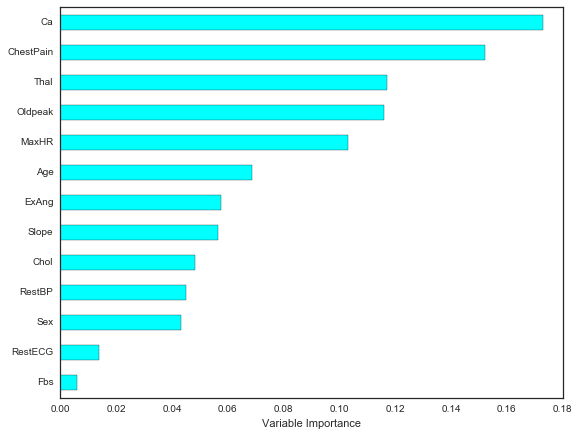

In [52]:
Importance=pd.DataFrame({'feature':X.columns, 'importance':GB_clf_x.feature_importances_}).sort_values(
    by='importance', ascending=True)

fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(9,7)) 

Importance.plot(kind='barh', color='cyan', ax=ax1)
y_pos = np.arange(len(Importance))
plt.xlabel('Variable Importance')
plt.gca().legend_ = None
plt.yticks(y_pos, Importance.feature)
plt.show()

Random Forest는 'MaxHR'을 가장 중요한 변수라 했는데, GBM은'Ca'가 가장 중요하다 하고 'MaxHR'은 다섯번째. 

In [53]:
print('exit 0')

exit 0
